In [1]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4*4 random 행렬 a 생성
np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [6]:
U, Sigma,Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value: \n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
Sigma Value: 
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [8]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


데이터 의존도가 높은 ㅜ언본 데이터 행렬 생성 for compact SVD

In [9]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [11]:
# 다시 SVD를 수행하여 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [13]:
# U 행렬의 경우는 Sigma 와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape,Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


## Truncated SVD 를 이용한 행렬 분해

In [14]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

#원본 행렬을 출력하고, SVD 를 적용할 경우 U, Sigma, Vt 의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬 : \n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices = False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

원본 행렬 : 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [16]:
#Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 5
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr) # output of TruncatedSVD

print('\nTruncated SVVD로 분해 후 복원 행렬:\n',matrix_tr)


Truncated SVD 분해 행렬 차원: (6, 5) (5,) (5, 6)

Truncated SVD Sigma값 행렬: [0.35834824 0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVVD로 분해 후 복원 행렬:
 [[0.11368271 0.19721195 0.23106956 0.15961551 0.82758207 0.41695496]
 [0.55500167 0.75007112 0.24913473 0.96608621 0.95355502 0.48681791]
 [0.01789183 0.85994318 0.40526464 0.62115143 0.29581906 0.92803075]
 [0.40782587 0.55456069 0.24397702 0.23294659 0.035838   0.58947208]
 [0.82711496 0.78558742 0.94865955 0.7293489  0.67564311 0.73695659]
 [0.5136488  0.45748403 0.64231412 0.82744766 0.14323933 0.0258799 ]]


## 사이킷런 TruncatedSVD 클래스를 이용한 변환

In [19]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD로 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

Text(0, 0.5, 'TruncatedSVD Component 2')

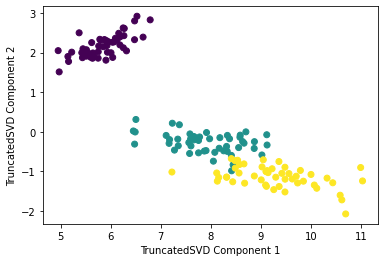

In [23]:
#Scatter Plot 2차원으로 TruncatedSVD 변환 된 데이터 표현, 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')